In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")
import matplotlib.ticker as ticker
sns.__version__

'0.11.0'

In [2]:
def load_benchmark_and_annotate(filename, n_query, n_against):
    df = pd.read_csv(filename, sep='\t')
    df['n_query'] = int(n_query)
    df['n_against'] = int(n_against)
    
    return df

load_benchmark_and_annotate('benchmarks/a_100_vs_a.txt', 100, 10000)

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,n_query,n_against
0,1347.0233,0:22:27,12910.21,15135.63,13073.72,13073.72,0.01,0.14,2762.7,37225.36,100,10000


In [3]:
query_line = [ load_benchmark_and_annotate(f"benchmarks/a_{x}_vs_a.txt", x, 10000) for x in range(100, 1000, 100) ]
#query_line.append(load_benchmark_and_annotate('benchmarks/a_vs_a.txt', 1000, 10000))
query_line_df = pd.concat(query_line)
query_line_df

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,n_query,n_against
0,1347.0233,0:22:27,12910.21,15135.63,13073.72,13073.72,0.01,0.14,2762.70,37225.36,100,10000
0,1291.4875,0:21:31,14541.96,18260.40,14601.04,14601.05,0.01,0.24,3044.57,39323.17,200,10000
0,1454.4474,0:24:14,16348.15,18954.26,16429.44,16429.44,0.02,0.31,2828.24,41136.09,300,10000
0,1551.7362,0:25:51,14438.77,16864.46,14666.07,14666.08,0.02,0.40,2751.87,42702.26,400,10000
0,1603.6622,0:26:43,18893.50,21000.83,18968.33,18968.33,0.03,0.48,2802.76,44947.46,500,10000
0,1696.6006,0:28:16,17783.73,19868.45,17888.35,17888.35,0.03,0.59,2755.67,46753.81,600,10000
0,1610.4366,0:26:50,16855.73,19042.42,16989.04,16989.04,0.04,0.70,3032.36,48835.22,700,10000
0,1770.2948,0:29:30,16316.45,19000.11,16440.92,16440.92,0.04,0.85,2863.60,50694.71,800,10000
0,1806.3763,0:30:06,16779.61,19569.78,16286.82,16286.82,95967.58,0.97,2889.70,52198.87,900,10000


In [4]:
against_line = [ load_benchmark_and_annotate(f"benchmarks/a_vs_a_{x}.txt", 1000, x) for x in range(1000, 10000, 1000) ]
#against_line.append(load_benchmark_and_annotate('benchmarks/a_vs_a.txt', 1000, 10000))
against_line_df = pd.concat(against_line)
against_line_df

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,n_query,n_against
0,154.1568,0:02:34,8026.29,8707.47,8042.18,8042.25,0.07,0.11,2112.52,3256.75,1000,1000
0,269.0769,0:04:29,8977.02,9920.71,8961.81,8961.88,0.13,0.25,2450.90,6594.63,1000,2000
0,354.2737,0:05:54,11786.54,13038.87,11863.02,11863.11,0.20,0.36,2943.38,10428.58,1000,3000
0,478.0915,0:07:58,13964.38,15485.38,14074.45,14074.53,0.26,0.48,3003.24,14358.91,1000,4000
0,704.6193,0:11:44,15294.20,18001.37,15028.22,15028.30,0.33,0.64,2722.32,19182.34,1000,5000
0,1073.2904,0:17:53,12150.98,14048.74,12201.99,12201.99,0.39,0.73,2635.62,28288.41,1000,6000
0,1269.1121,0:21:09,15887.25,17586.37,15507.43,15507.43,0.46,0.79,2923.52,37104.07,1000,7000
0,1419.2742,0:23:39,16026.34,18511.11,16068.09,16068.09,0.52,0.89,3018.64,42844.40,1000,8000
0,1576.3652,0:26:16,16715.54,19374.40,16759.83,16759.83,7.45,1.00,3052.70,48122.82,1000,9000


In [5]:
# for seaborn, we need these to be in a single dataframe
query_line_df['bench_type'] = "vary_n_queries"
query_line_df["varied_n"] = query_line_df['n_query']
against_line_df['bench_type'] = 'vary_n_subjects'
against_line_df['varied_n'] = against_line_df['n_against']

benchD = pd.concat([query_line_df, against_line_df])
benchD['min'] = benchD['s']/60
benchD.head()


,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,n_query,n_against,bench_type,varied_n,min
0,1347.0233,0:22:27,12910.21,15135.63,13073.72,13073.72,0.01,0.14,2762.70,37225.36,100,10000,vary_n_queries,100,22.450388
0,1291.4875,0:21:31,14541.96,18260.40,14601.04,14601.05,0.01,0.24,3044.57,39323.17,200,10000,vary_n_queries,200,21.524792
0,1454.4474,0:24:14,16348.15,18954.26,16429.44,16429.44,0.02,0.31,2828.24,41136.09,300,10000,vary_n_queries,300,24.240790
0,1551.7362,0:25:51,14438.77,16864.46,14666.07,14666.08,0.02,0.40,2751.87,42702.26,400,10000,vary_n_queries,400,25.862270
0,1603.6622,0:26:43,18893.50,21000.83,18968.33,18968.33,0.03,0.48,2802.76,44947.46,500,10000,vary_n_queries,500,26.727703


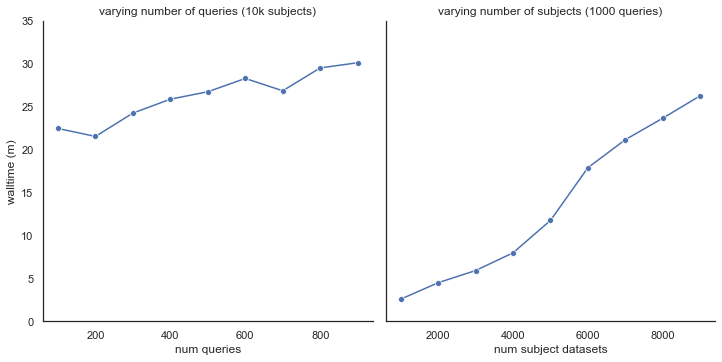

In [6]:
# seaborn version -- no real point to this bc we need to access
# the individual axes anyway, since we need diff labels. but here's the SAME PLOT
g = sns.relplot(data=benchD, x='varied_n', y='min', col="bench_type", \
                markers=True,marker="o",\
                kind='line', facet_kws=dict(sharex=False))
g.set(ylim=(0, 35))

titles = ["varying number of queries (10k subjects)", 'varying number of subjects (1000 queries)']
x_labels = ['num queries', 'num subject datasets']
y_label = 'walltime (m)'
tick_dist=[200, 2000]

for n, ax in enumerate(g.axes.flat):
    ax.set_title(titles[n])
    ax.set_xlabel(x_labels[n])
    ax.set_ylabel(y_label)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_dist[n]))

In [7]:
def load_benchmark_replicate(filename, ident):
    df = pd.read_csv(filename, sep='\t')
    df['ident'] = ident
    
    return df

replicates_df = [ load_benchmark_replicate(f"benchmarks/a_vs_{x}.txt", x) for x in ('a','b','c','d','e')]
#query_line.append(load_benchmark_and_annotate('benchmarks/a_vs_a.txt', 1000, 10000))
replicates_df = pd.concat(replicates_df)
replicates_df

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,ident
0,1394.1251,0:23:14,16106.77,18410.19,16167.91,16167.94,95974.41,1.14,2914.11,40626.79,a
0,1394.1750,0:23:14,17553.49,20057.43,17685.95,17685.99,94003.57,1.16,2771.80,38643.81,b
0,1357.7237,0:22:37,18257.87,20041.38,18277.77,18277.80,91280.15,1.01,2794.07,37936.37,c
0,1505.0091,0:25:05,16107.48,19187.17,16137.28,16137.32,93738.74,1.02,2605.24,39209.39,d
0,1596.4828,0:26:36,14046.44,15868.38,14061.43,14061.46,91948.11,0.96,2367.13,37791.57,e


In [8]:
# for seaborn, melt dataframe
replicates_df['mins'] = replicates_df['s']/60
replicates_df['max_rss_gb'] = replicates_df['max_rss']/1000
replicates_df['io_in_gb'] = replicates_df['io_in']/1000

val_vars = ['mins', 'max_rss_gb','io_in_gb'] # 'max_vms', 'max_uss','max_pss', 'io_in','io_out','mean_load','cpu_time']
melted_reps = pd.melt(replicates_df, id_vars = 'ident', value_vars=val_vars, var_name='benchmark',value_name='val')
melted_reps.head()

,ident,benchmark,val
0,a,mins,23.235418
1,b,mins,23.236250
2,c,mins,22.628728
3,d,mins,25.083485
4,e,mins,26.608047


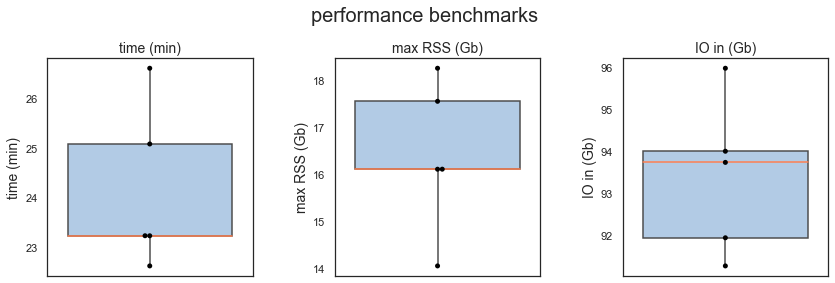

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharey=False)
fig.suptitle('performance benchmarks', size=20, y=1.06)

xlabels=['time (min)', 'max RSS (Gb)', 'IO in (Gb)']
ylabels=['min', 'Gb', 'Gb']

for n,val in enumerate(val_vars):
    sns.boxplot(ax=axes[n], data=replicates_df, y=val_vars[n],
                medianprops={"color": "coral"},showcaps=False,
                boxprops={"facecolor": (.4, .6, .8, .5)})#, notch=True)
    sns.swarmplot(ax=axes[n], data=replicates_df, y=val_vars[n], color='black')
    axes[n].yaxis.set_major_locator(ticker.MultipleLocator(1))
    axes[n].set_title(xlabels[n], size=14)

    #axes[n].set_xlabel(xlabels[n], size=14)
    axes[n].set_ylabel(xlabels[n], size=14)
plt.subplots_adjust(wspace=0.4)

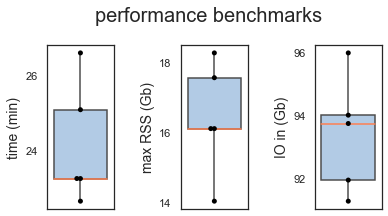

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(6, 3), sharey=False)
fig.suptitle('performance benchmarks', size=20, y=1.06)

xlabels=['time (min)', 'max RSS (Gb)', 'IO in (Gb)']
ylabels=['min', 'Gb', 'Gb']

for n,val in enumerate(val_vars):
    sns.boxplot(ax=axes[n], data=replicates_df, y=val_vars[n],
                medianprops={"color": "coral"},showcaps=False,
                boxprops={"facecolor": (.4, .6, .8, .5)})#, notch=True)
    sns.swarmplot(ax=axes[n], data=replicates_df, y=val_vars[n], color='black')
    axes[n].yaxis.set_major_locator(ticker.MultipleLocator(2))
    #axes[n].set_title(xlabels[n], size=14)

    #axes[n].set_xlabel(xlabels[n], size=14)
    axes[n].set_ylabel(xlabels[n], size=14)
plt.subplots_adjust(wspace=1)

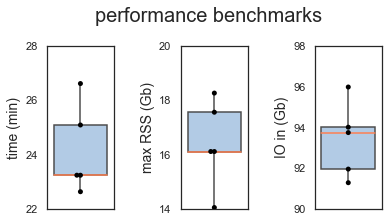

In [11]:
# add ylims 
fig, axes = plt.subplots(1, 3, figsize=(6, 3), sharey=False)
fig.suptitle('performance benchmarks', size=20, y=1.06)

xlabels=['time (min)', 'max RSS (Gb)', 'IO in (Gb)']
ylabels=['min', 'Gb', 'Gb']
ylim= [(22,28), (14,20), (90,98)]

for n,val in enumerate(val_vars):
    sns.boxplot(ax=axes[n], data=replicates_df, y=val_vars[n],
                medianprops={"color": "coral"},showcaps=False,
                boxprops={"facecolor": (.4, .6, .8, .5)})#, notch=True)
    sns.swarmplot(ax=axes[n], data=replicates_df, y=val_vars[n], color='black')
    axes[n].yaxis.set_major_locator(ticker.MultipleLocator(2))
    #axes[n].set_title(xlabels[n], size=14)

    #axes[n].set_xlabel(xlabels[n], size=14)
    axes[n].set_ylabel(xlabels[n], size=14)
    axes[n].set_ylim(ylim[n])
plt.subplots_adjust(wspace=1)

In [12]:
def load_threads_benchmark_and_annotate(filename, n_threads):
    df = pd.read_csv(filename.format(threads=n_threads), sep='\t')
    df['threads'] = n_threads
    
    return df


x = [ load_threads_benchmark_and_annotate(f'benchmarks/a_vs_a_1000_t{t}.txt', t) for t in (4,8,16) ]
x.append(load_threads_benchmark_and_annotate(f'benchmarks/a_vs_a_1000.txt', 32))

threads_df = pd.concat(x)

In [13]:
threads_df

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,threads
0,814.4291,0:13:34,2246.58,2380.33,2243.58,2244.08,89.14,0.11,341.55,2782.05,4
0,484.0369,0:08:04,2661.74,3352.14,2661.75,2662.25,1189.09,0.11,649.08,3142.19,8
0,329.2121,0:05:29,6144.40,7038.87,6169.71,6170.21,7404.52,0.10,1137.80,3746.52,16
0,154.1568,0:02:34,8026.29,8707.47,8042.18,8042.25,0.07,0.11,2112.52,3256.75,32


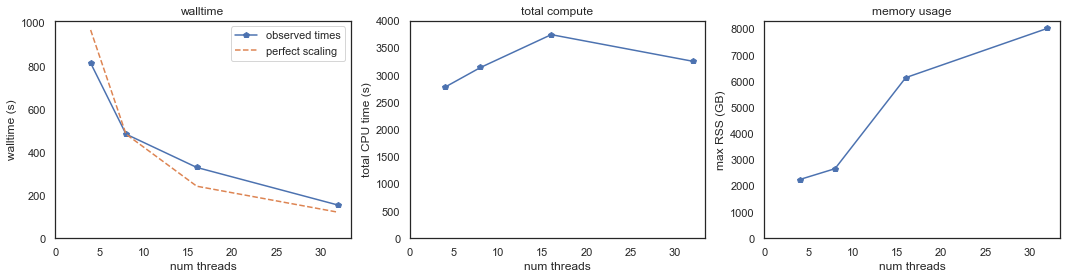

In [14]:
#fig = plt.figure()
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

ax = axs[0]
ax.plot(threads_df.threads, threads_df.s, '-p', label='observed times')
ax.plot([4, 8, 16, 32], [484 * 2, 484, 484 / 2, 484 / 4], '--', label='perfect scaling')
ax.axis(xmin=0, ymin=0)
ax.set_xlabel('num threads')
ax.set_ylabel('walltime (s)')
ax.set_title('walltime')
ax.legend(loc='upper right')

ax = axs[1]
ax.plot(threads_df.threads, threads_df.cpu_time, '-p')
ax.axis(xmin=0, ymin=0, ymax=4000)
ax.set_xlabel('num threads')
ax.set_ylabel('total CPU time (s)')
ax.set_title('total compute')

ax = axs[2]
ax.plot(threads_df.threads, threads_df.max_rss, '-p')
ax.axis(xmin=0, ymin=0)
ax.set_xlabel('num threads')
ax.set_ylabel('max RSS (GB)')
ax.set_title('memory usage')

plt.savefig('basic_benchmarks.svg')